In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.physics.hydrogen import R_nl
from sympy import integrate, oo, var
from numerov import radial_integral
from numerov.basis import generate_basis

In [3]:
basis = list(generate_basis(range(4, 7)))
print(basis)

[(4.0, 0.0), (4.0, 1.0), (4.0, 2.0), (4.0, 3.0), (5.0, 0.0), (5.0, 1.0), (5.0, 2.0), (5.0, 3.0), (5.0, 4.0), (6.0, 0.0), (6.0, 1.0), (6.0, 2.0), (6.0, 3.0), (6.0, 4.0), (6.0, 5.0)]


In [4]:
%%time
step = 0.0001
mat_numerov = np.zeros((len(basis), len(basis)))
for i, state_1 in enumerate(basis):
    for j, state_2 in enumerate(basis):
        mat_numerov[i, j] = radial_integral(*state_1, *state_2, step=step)

CPU times: user 815 ms, sys: 0 ns, total: 815 ms
Wall time: 815 ms


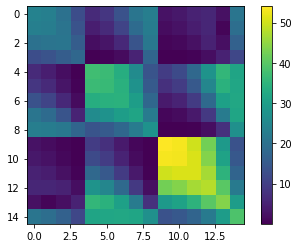

In [5]:
fig, ax = plt.subplots()
p = ax.imshow(np.abs(mat_numerov))
plt.colorbar(p)
plt.show()

In [6]:
%%time
var("r")
mat_sympy = np.zeros((len(basis), len(basis)))
for i, state_1 in enumerate(basis):
    for j, state_2 in enumerate(basis):
        mat_sympy[i, j] = integrate(R_nl(*state_2, r) * r**3 * R_nl(*state_1, r), (r, 0, oo)).evalf()

CPU times: user 20.5 s, sys: 67.2 ms, total: 20.6 s
Wall time: 20.6 s


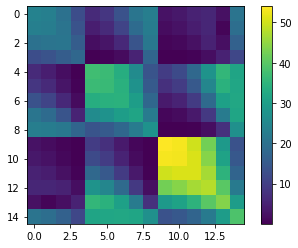

In [7]:
fig, ax = plt.subplots()
p = ax.imshow(np.abs(mat_sympy))
plt.colorbar(p)
plt.show()

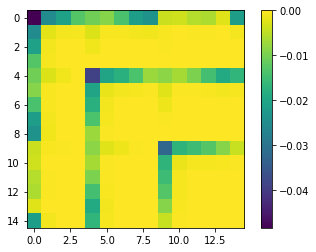

In [8]:
# diff
fig, ax = plt.subplots()
p = ax.imshow(np.abs(mat_sympy) - np.abs(mat_numerov))
plt.colorbar(p)
plt.show()

In [9]:
n1, l1 = 12, 5
n2, l2 = 15, 4

In [10]:
integral_sympy = integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()
print(integral_sympy)

4.57318723103945


In [11]:
integral_numerov = radial_integral(n1, l1, n2, l2, step=step)
print(integral_numerov)

4.573187231242028


In [12]:
# fractional difference
abs(integral_numerov - integral_sympy) / integral_sympy

4.42975659646626e-11

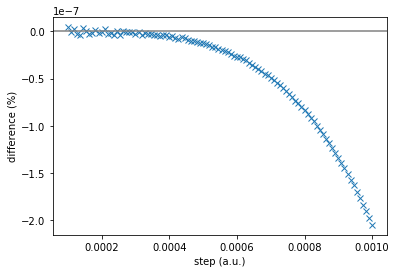

In [13]:
# compare step size
step_values = np.linspace(0.0001, 0.001, 100)
integral_values = np.array([radial_integral(n1, l1, n2, l2, step=st) for st in step_values])

# plot
fig, ax = plt.subplots()
ax.plot(step_values, 100.0 * (integral_values - integral_sympy) / integral_sympy, "x")
ax.axhline(0, c='grey')
ax.set_xlabel("step (a.u.)")
ax.set_ylabel("difference (%)")
plt.show()

In [14]:
# sympy
%timeit integrate(R_nl(n1, l1, r) * r**3 * R_nl(n2, l2, r), (r, 0, oo)).evalf()

151 ms ± 22.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [15]:
# numerov
%timeit radial_integral(n1, l1, n2, l2, step=step)

5.88 ms ± 677 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
